In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# def empty():
#   pass

# cv2.namedWindow("Parameters")
# # cv2.resizeWindow("Parameters", 640, 240)
# cv2.createTrackbar("Threshold1", "Parameters", 150, 255, empty)
# cv2.createTrackbar("Threshold2", "Parameters", 255, 255, empty)

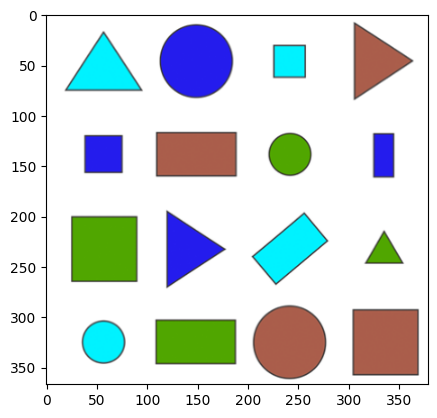

In [ ]:
img = cv2.imread("test_2.png")
plt.imshow(img)

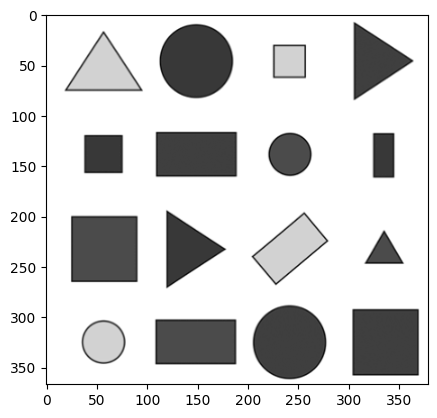

In [ ]:
imgContour = img.copy()
# img_blur = cv2.GaussianBlur(img, (7,7), 1)
img_gray = cv2.cvtColor(imgContour, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')

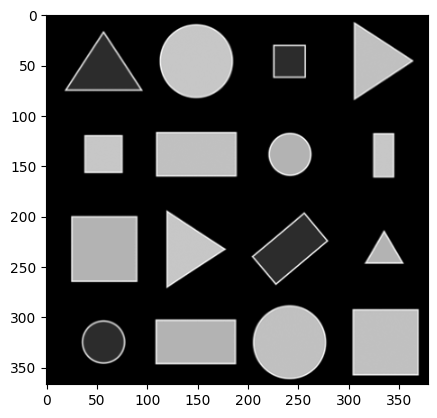

In [ ]:
gray_inverted = cv2.bitwise_not(img_gray)
plt.imshow(gray_inverted, cmap='gray')

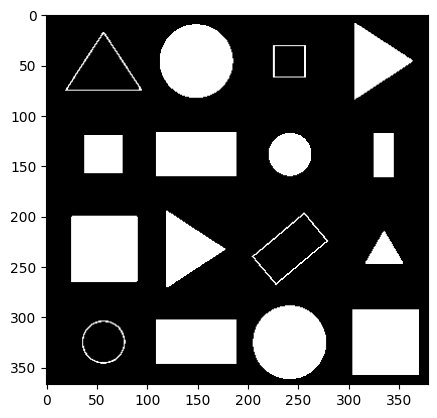

In [ ]:
_, binary = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY_INV)

plt.imshow(binary, cmap='gray')

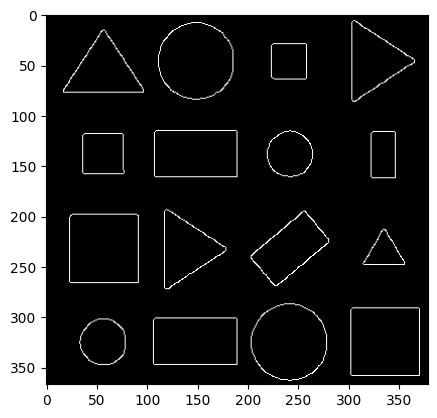

In [ ]:
# threshold1 = cv2.getTrackerbarPos("Threshold1", "Parameters")
# threshold2 = cv2.getTrackerbarPos("Threshold2", "Parameters")
img_Canny = cv2.Canny(binary, 300, 300)
# kernel = np.ones((5,5))
# imgDil = cv2.dilate(img_Canny, kernel, iterations=1)
plt.imshow(img_Canny, cmap='gray')

In [ ]:
def getContours(img, imgContour):
  contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  # print(contours, hierarchy)
  print(f"Number of countours found: {len(contours)}")
  for cnt in contours:
    # plt.imshow(cnt, cmap='gray')
    # print(cnt)
    area = cv2.contourArea(cnt)
    # print(area)
    # if area > 5000:
    #   print(area)
    cv2.drawContours(imgContour, cnt, -1, (255, 0, 255), 2)
    peri = cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, 0.04 * peri, True)
    print("pts: ", len(approx))
    x, y, w, h = cv2.boundingRect(approx)
    cv2.putText(imgContour, "Points: " + str(len(approx)), (x+5,y), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0,0,0), 1)
    cv2.putText(imgContour, "Area: " + str(int(area)), (x+5,y+10), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0,0,0), 1)

getContours(binary, imgContour)


Number of countours found: 16
pts:  6
pts:  4
pts:  4
pts:  7
pts:  3
pts:  4
pts:  4
pts:  3
pts:  4
pts:  4
pts:  6
pts:  4
pts:  4
pts:  3
pts:  6
pts:  3


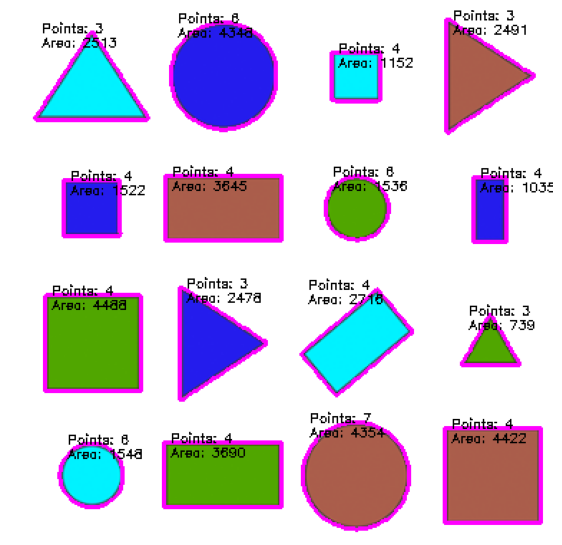

In [ ]:
plt.figure(figsize=(7,7))
plt.imshow(imgContour, cmap='gray')
plt.axis("off")
plt.show()